In [1]:
# Load EDA
import pandas as pd
import geopandas as gpd
import descartes
# Load Data Vis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
# Load Dataset
sars = pd.read_csv("pandemic_sars_dataset.csv")
ebola = pd.read_csv("pandemic_ebola_dataset.csv")
covid = pd.read_csv("covid_19_clean.csv")

In [3]:
# Data Analysis of Sars
sars.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Lat,Long
0,2003-03-17,Germany,1,0,0,51.0000,9.0000
1,2003-03-17,Canada,8,2,0,64.2823,-135.0000
2,2003-03-17,Singapore,20,0,0,1.2833,103.8333
3,2003-03-17,Hong Kong,95,1,0,NaN,NaN
4,2003-03-17,Switzerland,2,0,0,46.8182,8.2275


In [4]:
sars.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Lat',
       'Long'],
      dtype='object')

In [6]:
# Number of Cases Per day
sars_per_day = sars.groupby(['Date'])[['Confirmed', 'Deaths', 'Recovered']].max()

In [7]:
sars_per_day

,Confirmed,Deaths,Recovered
Date,,,
2003-03-17,95,2,0
2003-03-18,123,2,0
2003-03-19,150,5,0
2003-03-20,173,6,0
2003-03-21,203,6,0
...,...,...,...
2003-07-07,5327,348,4934
2003-07-08,5327,348,4934
2003-07-09,5327,348,4939


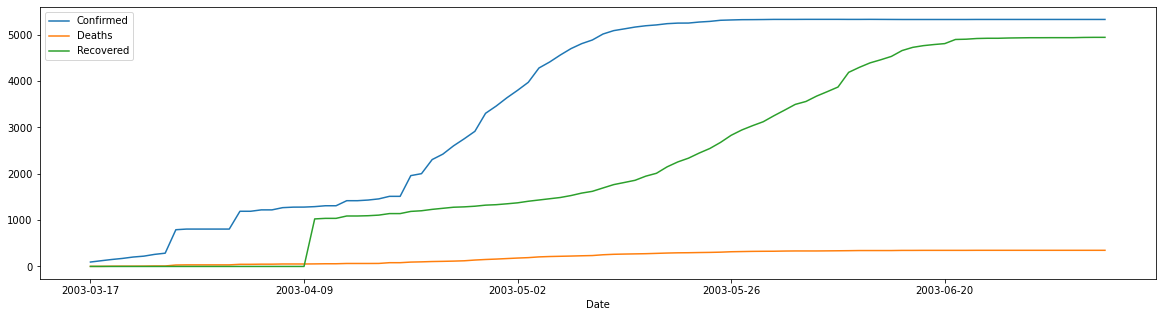

In [8]:
sars_per_day.plot(kind='line',figsize=(20,5))

In [9]:
# Analysis for ebola
ebola.head()

,Country/Region,Date,Confirmed,Deaths,Lat,Long
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889


In [10]:
ebola_per_day = ebola.groupby(['Date'])[['Confirmed', 'Deaths']].max()

In [11]:
ebola_per_day

,Confirmed,Deaths
Date,,
2014-08-29,935.0,380.0
2014-09-05,1146.0,443.0
2014-09-08,1234.0,508.0
2014-09-12,1287.0,498.0
2014-09-16,1464.0,563.0
...,...,...
2015-12-17,8704.0,3589.0
2015-12-22,8704.0,3589.0
2015-12-23,8704.0,3589.0


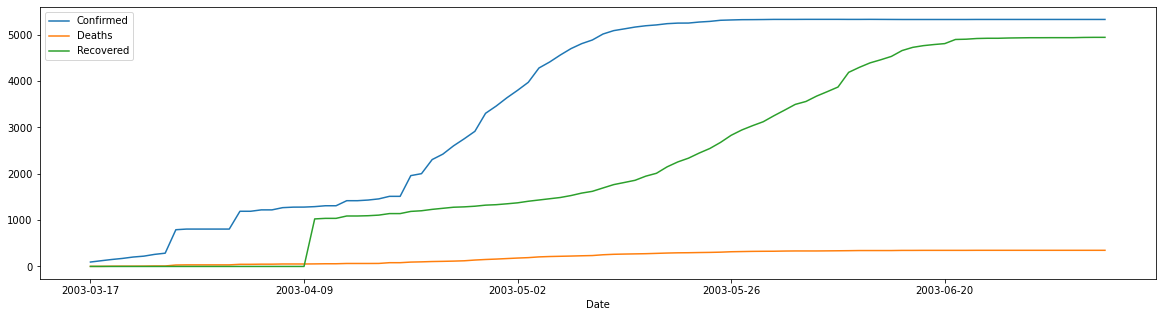

In [12]:
sars_per_day.plot(kind='line',figsize=(20,5))

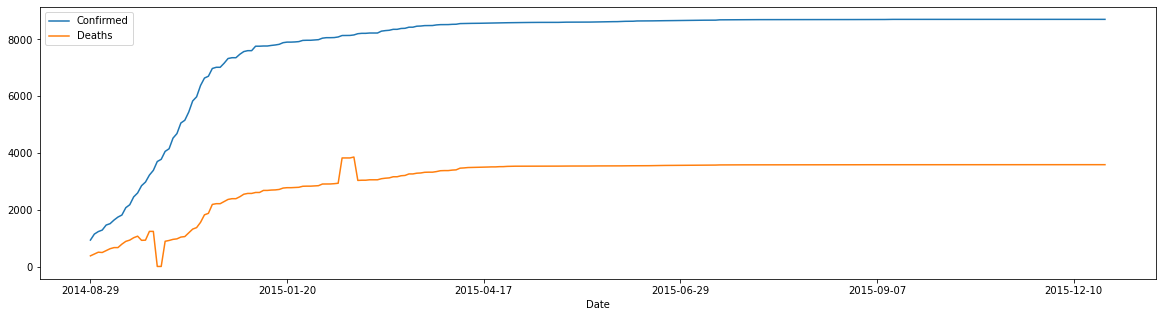

In [13]:
ebola_per_day.plot(kind='line',figsize=(20,5))

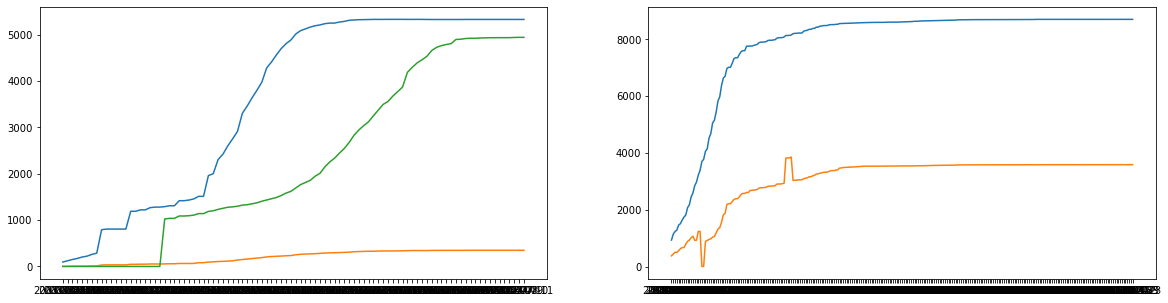

In [14]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axes[0].plot(sars_per_day)
axes[1].plot(ebola_per_day)

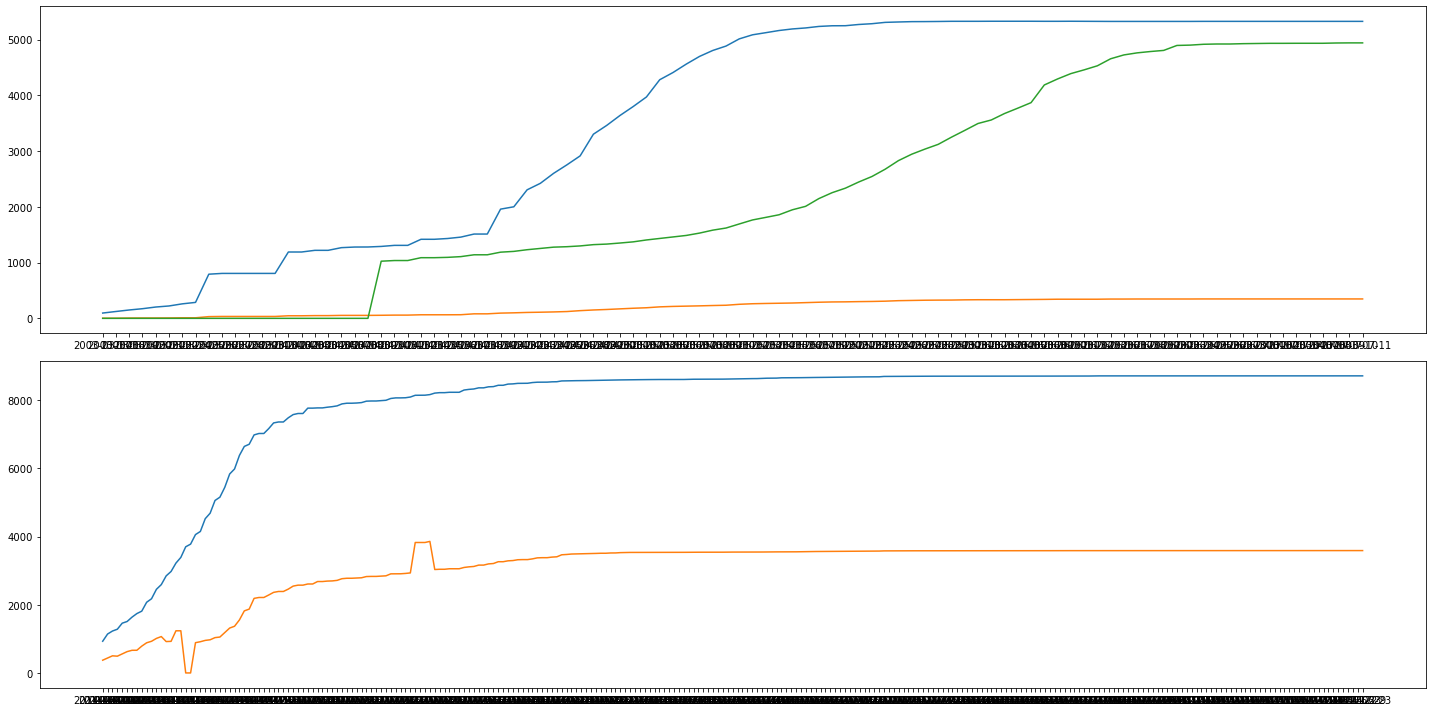

In [15]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(20,10))
axes[0].plot(sars_per_day)
axes[1].plot(ebola_per_day)
fig.tight_layout()

In [22]:
# Analysis of Covid
covid.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.93911,67.709953,01-22-20,0,0,0
1,Albania,41.15330,20.168300,01-22-20,0,0,0
2,Algeria,28.03390,1.659600,01-22-20,0,0,0
3,Andorra,42.50630,1.521800,01-22-20,0,0,0
4,Angola,-11.20270,17.873900,01-22-20,0,0,0


In [23]:
covid_per_day = covid.groupby(['Date'])[['Confirmed', 'Deaths', 'Recovered']].max()

In [24]:
covid_per_day

,Confirmed,Deaths,Recovered
Date,,,
01-22-20,444,17,28
01-23-20,444,17,28
01-24-20,549,24,31
01-25-20,761,40,32
01-26-20,1058,52,42
...,...,...,...
07-20-20,3834677,141025,1514300
07-21-20,3899211,142107,1555339
07-22-20,3970121,143302,1591975


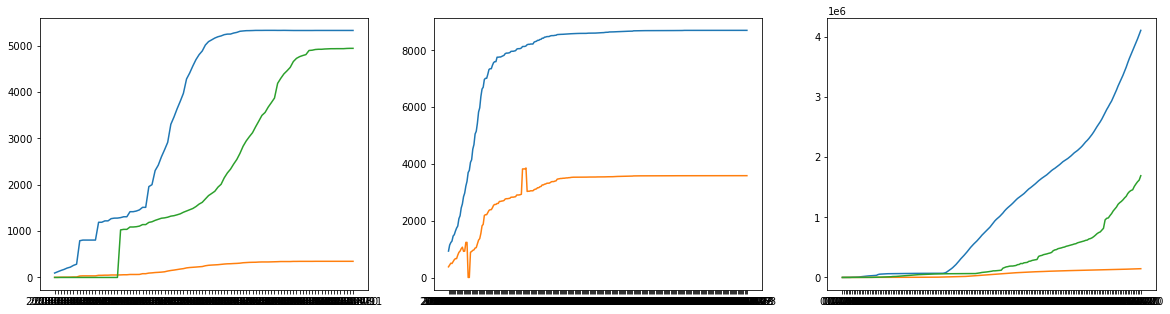

In [25]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
axes[0].plot(sars_per_day)
axes[1].plot(ebola_per_day)
axes[2].plot(covid_per_day)

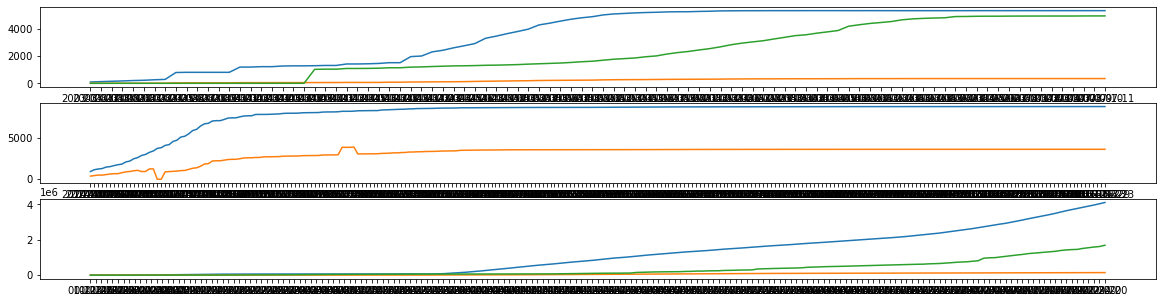

In [26]:
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(20,5))
axes[0].plot(sars_per_day)
axes[1].plot(ebola_per_day)
axes[2].plot(covid_per_day)

In [27]:
covid.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.93911,67.709953,01-22-20,0,0,0
1,Albania,41.15330,20.168300,01-22-20,0,0,0
2,Algeria,28.03390,1.659600,01-22-20,0,0,0
3,Andorra,42.50630,1.521800,01-22-20,0,0,0
4,Angola,-11.20270,17.873900,01-22-20,0,0,0


In [28]:
### Checking for the first 100 days
import datetime

In [30]:
sars_cases = pd.read_csv("pandemic_sars_dataset.csv",parse_dates=['Date'],index_col='Date')
ebola_cases = pd.read_csv("pandemic_ebola_dataset.csv",parse_dates=['Date'],index_col='Date')
covid_cases = pd.read_csv("covid_19_clean.csv",parse_dates=['Date'],index_col='Date')

In [31]:
sars_cases

,Country/Region,Confirmed,Deaths,Recovered,Lat,Long
Date,,,,,,
2003-03-17,Germany,1,0,0,51.0000,9.0000
2003-03-17,Canada,8,2,0,64.2823,-135.0000
2003-03-17,Singapore,20,0,0,1.2833,103.8333
2003-03-17,Hong Kong,95,1,0,NaN,NaN
2003-03-17,Switzerland,2,0,0,46.8182,8.2275
...,...,...,...,...,...,...
2003-07-11,Switzerland,1,0,1,46.8182,8.2275
2003-07-11,Thailand,9,2,7,15.0000,101.0000
2003-07-11,United Kingdom,4,0,4,21.6940,-71.7979


In [32]:
# Checking For 1st 100 days
sars_start_date = '2003-03-17'
day_100_sars = sars_start_date

In [33]:
datetime.datetime.strptime(sars_start_date,"%Y-%m-%d") + datetime.timedelta(days=100)

datetime.datetime(2003, 6, 25, 0, 0)

In [34]:
def get_100_days(start_date):
    day_100 = datetime.datetime.strptime(start_date,"%Y-%m-%d") + datetime.timedelta(days=100)
    return day_100

In [35]:
get_100_days(sars_start_date)

datetime.datetime(2003, 6, 25, 0, 0)

In [36]:
sars_cases['2003-03-17':'2003-6-25']

,Country/Region,Confirmed,Deaths,Recovered,Lat,Long
Date,,,,,,
2003-03-17,Germany,1,0,0,51.0000,9.0000
2003-03-17,Canada,8,2,0,64.2823,-135.0000
2003-03-17,Singapore,20,0,0,1.2833,103.8333
2003-03-17,Hong Kong,95,1,0,NaN,NaN
2003-03-17,Switzerland,2,0,0,46.8182,8.2275
...,...,...,...,...,...,...
2003-06-25,Switzerland,1,0,1,46.8182,8.2275
2003-06-25,Thailand,9,2,7,15.0000,101.0000
2003-06-25,United Kingdom,4,0,4,21.6940,-71.7979


In [37]:
# Ebola
ebola_start_day = "2014-08-29"
# Covid
covid_start_day = "2020-01-22"

In [38]:
print(get_100_days(ebola_start_day))
print(get_100_days(covid_start_day))

2014-12-07 00:00:00
2020-05-01 00:00:00


In [39]:
sars_day_100 = sars_cases['2003-03-17':'2003-6-25']
ebola_day_100 = ebola_cases[ebola_start_day:'2014-12-07']
covid_day_100 = covid_cases[covid_start_day:'2020-05-01']

In [40]:
sars_day_100.groupby(sars_day_100.index)[['Confirmed','Deaths','Recovered']].max()

,Confirmed,Deaths,Recovered
Date,,,
2003-03-17,95,2,0
2003-03-18,123,2,0
2003-03-19,150,5,0
2003-03-20,173,6,0
2003-03-21,203,6,0
...,...,...,...
2003-06-19,5326,347,4786
2003-06-20,5326,347,4806
2003-06-23,5326,347,4895


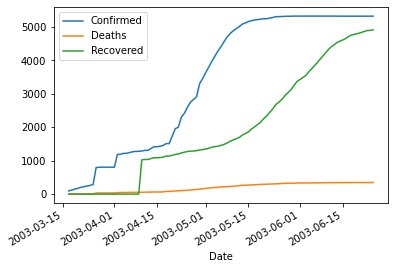

In [42]:
# Plot
sars_day_100.groupby(sars_day_100.index)[['Confirmed','Deaths','Recovered']].max().plot(kind='line')

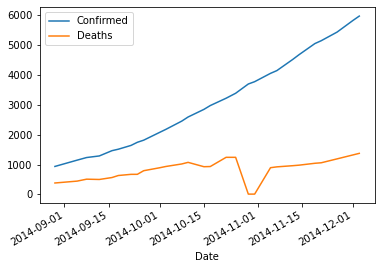

In [44]:
ebola_day_100.groupby(ebola_day_100.index)[['Confirmed','Deaths']].max().plot(kind='line')

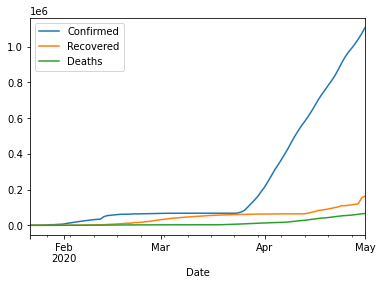

In [45]:
covid_day_100.groupby(covid_day_100.index)[['Confirmed','Recovered','Deaths']].max().plot(kind='line')

In [46]:
### Top Countries Affected
ebola

,Country/Region,Date,Confirmed,Deaths,Lat,Long
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889
...,...,...,...,...,...,...
2480,Liberia,2016-03-23,3151.0,NaN,6.428100,-9.429500
2481,Italy,2016-03-23,1.0,NaN,43.000000,12.000000
2482,Liberia,2016-03-23,2.0,1.0,6.428100,-9.429500
2483,Nigeria,2016-03-23,19.0,7.0,9.082000,8.675300


In [47]:
grp_countries_ebola = ebola.groupby(['Country/Region'])[['Confirmed','Deaths']].max()

In [48]:
grp_countries_ebola

,Confirmed,Deaths
Country/Region,,
Guinea,3351.0,2083.0
Italy,1.0,0.0
Liberia,3153.0,3858.0
Mali,7.0,5.0
Nigeria,19.0,7.0
Senegal,1.0,0.0
Sierra Leone,8704.0,3589.0
Spain,1.0,0.0
US,4.0,1.0


In [49]:
# Number of Countries Affected
len(ebola['Country/Region'].unique())

10

In [50]:
# Number of Countries Affected
len(covid['Country/Region'].unique())

187

In [51]:
# Number of Countries Affected
len(sars['Country/Region'].unique())

36

In [52]:
# Top Countries Affect by Confirmed Cases
grp_countries_ebola.nlargest(3,'Confirmed')

,Confirmed,Deaths
Country/Region,,
Sierra Leone,8704.0,3589.0
Guinea,3351.0,2083.0
Liberia,3153.0,3858.0


In [53]:
# Top Countries Affect By Death
grp_countries_ebola.nlargest(3,'Deaths')

,Confirmed,Deaths
Country/Region,,
Liberia,3153.0,3858.0
Sierra Leone,8704.0,3589.0
Guinea,3351.0,2083.0


In [55]:
# Sars
grp_countries_sars = sars.groupby(['Country/Region'])[['Confirmed','Recovered','Deaths']].max()
# Covid
grp_countries_covid = covid.groupby(['Country/Region'])[['Confirmed','Recovered','Deaths']].max()

In [56]:
# Top Countries Affect By Death
grp_countries_sars.nlargest(10,'Deaths')

,Confirmed,Recovered,Deaths
Country/Region,,,
China,5329,4941,348
Hong Kong,1755,1433,298
Taiwan*,698,507,84
Canada,252,194,38
Singapore,206,172,32
Vietnam,63,58,5
Malaysia,8,5,2
Philippines,14,12,2
Thailand,9,7,2


In [57]:
# Top Countries Affect By Confirmed
grp_countries_sars.nlargest(10,'Confirmed')

,Confirmed,Recovered,Deaths
Country/Region,,,
China,5329,4941,348
Hong Kong,1755,1433,298
Taiwan*,698,507,84
Canada,252,194,38
US,220,67,0
Singapore,206,172,32
Vietnam,63,58,5
Philippines,14,12,2
Germany,10,9,0


In [58]:
# Top Countries Affect By Confirmed
grp_countries_sars.nsmallest(10,'Confirmed')

,Confirmed,Recovered,Deaths
Country/Region,,,
Belgium,1,0,0
Bulgaria,1,0,0
Colombia,1,1,0
Finland,1,1,0
Kuwait,1,1,0
New Zealand,1,1,0
Poland,1,0,0
Russia,1,0,0
Slovenia,1,0,0


In [59]:
# Top Countries Affect By Death
grp_countries_covid.nlargest(10,'Deaths')

,Confirmed,Recovered,Deaths
Country/Region,,,
US,4112531,1261624,145546
Brazil,2287475,1693214,85238
United Kingdom,297914,533,45677
Mexico,378285,283382,42645
Italy,245590,198192,35097
India,1337024,849432,31358
France,206418,72408,30081
Spain,272421,150376,28752
Peru,375961,259423,17843


In [60]:
# Top Countries Affect By Death
grp_countries_covid.nlargest(10,'Confirmed')

,Confirmed,Recovered,Deaths
Country/Region,,,
US,4112531,1261624,145546
Brazil,2287475,1693214,85238
India,1337024,849432,31358
Russia,799499,587728,13026
South Africa,421996,245771,6343
Mexico,378285,283382,42645
Peru,375961,259423,17843
Chile,341304,313696,8914
United Kingdom,297914,533,45677


In [61]:
ebola['Country/Region'].value_counts()

Liberia           365
Sierra Leone      259
Guinea            259
Nigeria           255
Senegal           254
US                245
Spain             243
Mali              243
United Kingdom    221
Italy             141
Name: Country/Region, dtype: int64

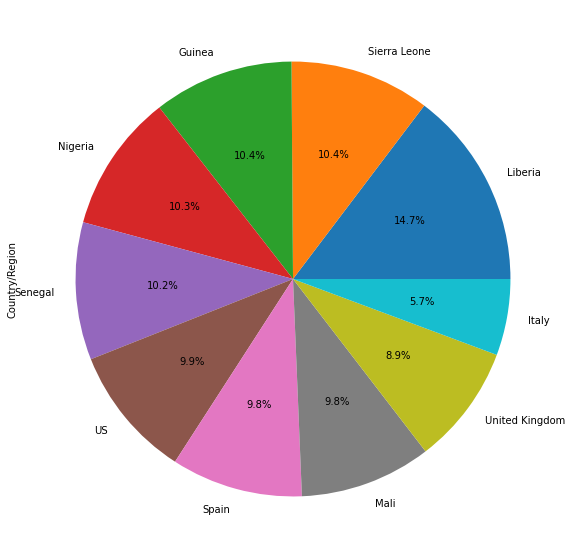

In [62]:
plt.figure(figsize=(20,10))
ebola['Country/Region'].value_counts().plot.pie(autopct="%1.1f%%")

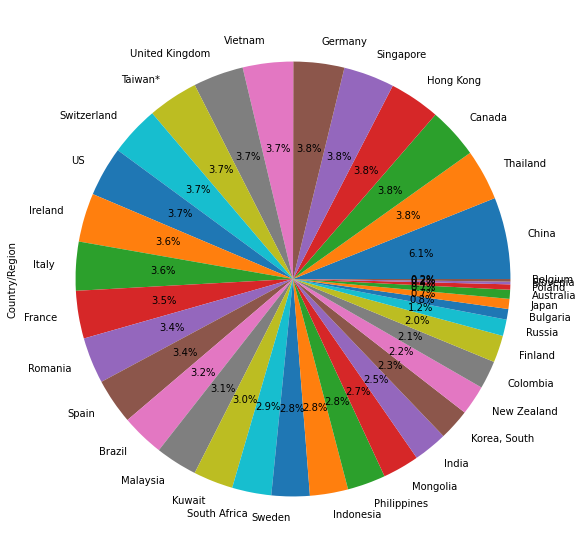

In [63]:
plt.figure(figsize=(20,10))
sars['Country/Region'].value_counts().plot.pie(autopct="%1.1f%%")

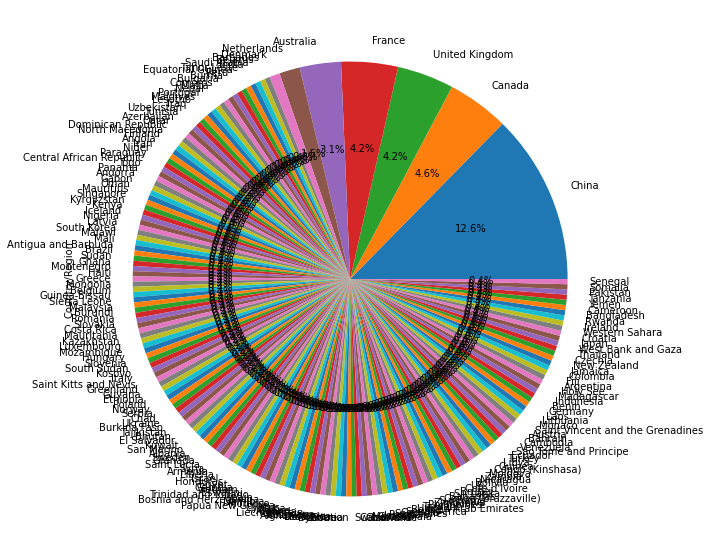

In [64]:
plt.figure(figsize=(20,10))
covid['Country/Region'].value_counts().plot.pie(autopct="%1.1f%%")

In [65]:
# Geopandas
gdf_ebola = gpd.GeoDataFrame(ebola,geometry=gpd.points_from_xy(ebola['Long'],ebola['Lat']))

In [66]:
gdf_ebola

,Country/Region,Date,Confirmed,Deaths,Lat,Long,geometry
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600,POINT (-9.69660 9.94560)
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300,POINT (8.67530 9.08200)
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889,POINT (-11.77989 8.46056)
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500,POINT (-9.42950 6.42810)
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889,POINT (-11.77989 8.46056)
...,...,...,...,...,...,...,...
2480,Liberia,2016-03-23,3151.0,NaN,6.428100,-9.429500,POINT (-9.42950 6.42810)
2481,Italy,2016-03-23,1.0,NaN,43.000000,12.000000,POINT (12.00000 43.00000)
2482,Liberia,2016-03-23,2.0,1.0,6.428100,-9.429500,POINT (-9.42950 6.42810)
2483,Nigeria,2016-03-23,19.0,7.0,9.082000,8.675300,POINT (8.67530 9.08200)


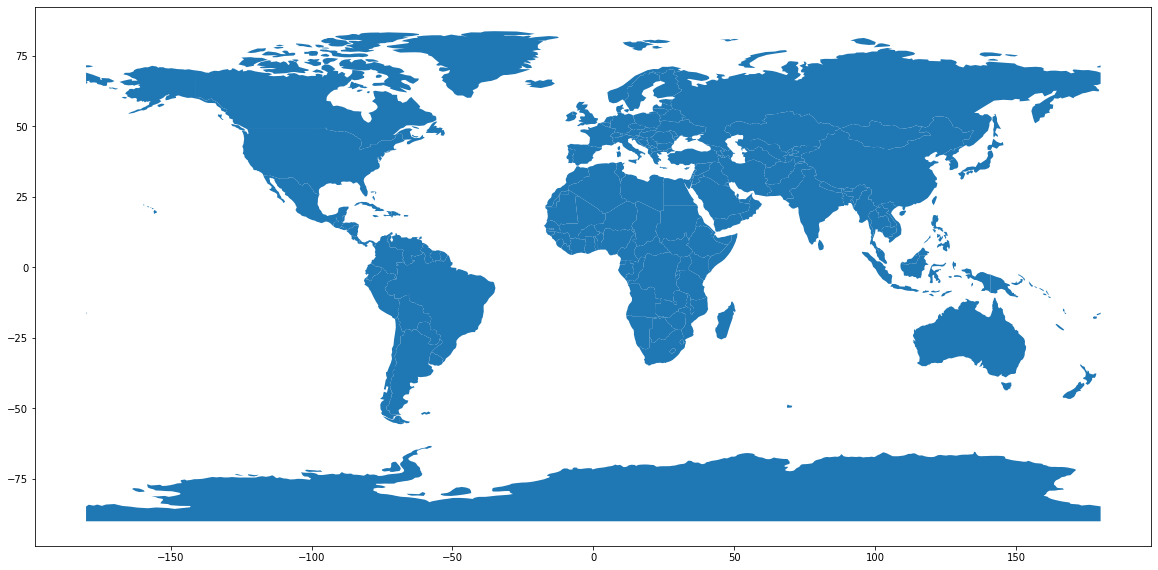

In [67]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
ax = world.plot(figsize=(20,10))

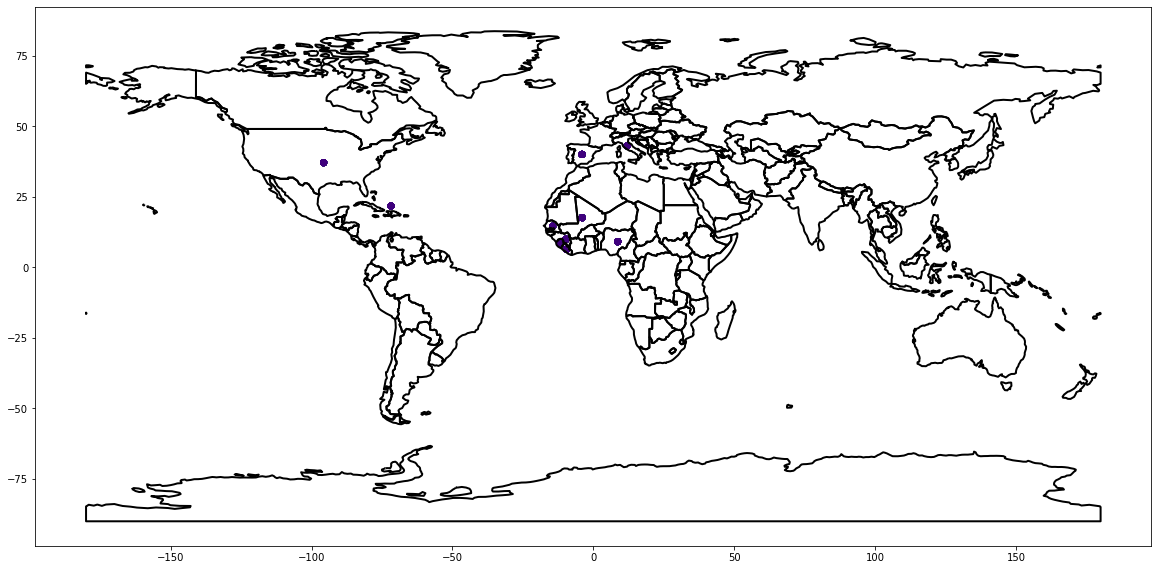

In [68]:
fig,ax = plt.subplots(figsize=(20,10))
gdf_ebola.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [69]:
# Geopandas
gdf_sars = gpd.GeoDataFrame(sars,geometry=gpd.points_from_xy(sars['Long'],sars['Lat']))

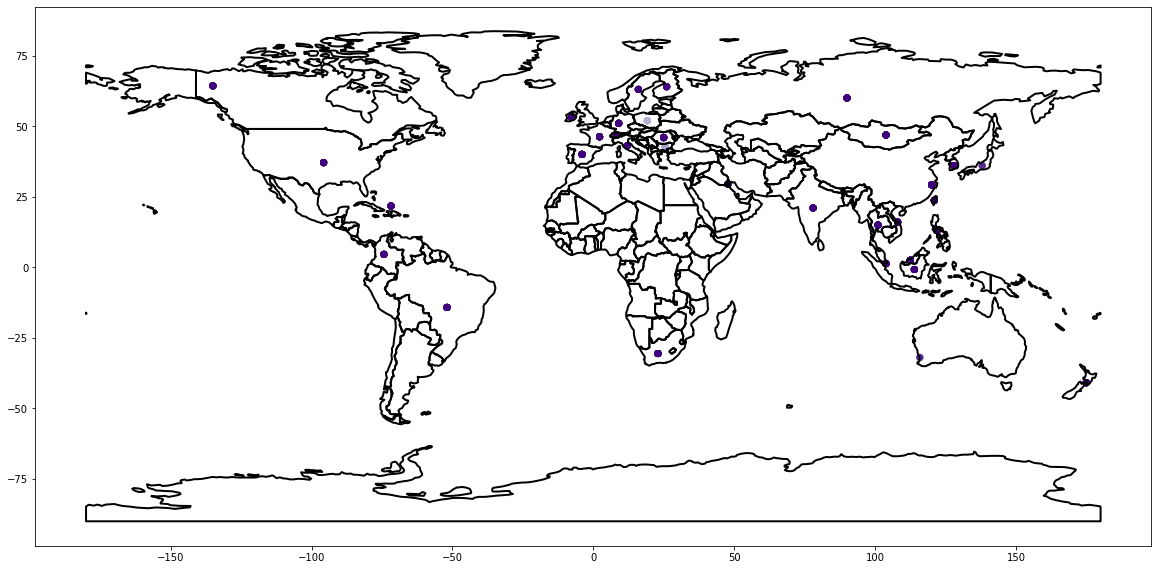

In [70]:
fig,ax = plt.subplots(figsize=(20,10))
gdf_sars.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [71]:
# Geopandas
gdf_covid = gpd.GeoDataFrame(covid,geometry=gpd.points_from_xy(covid['Long'],covid['Lat']))

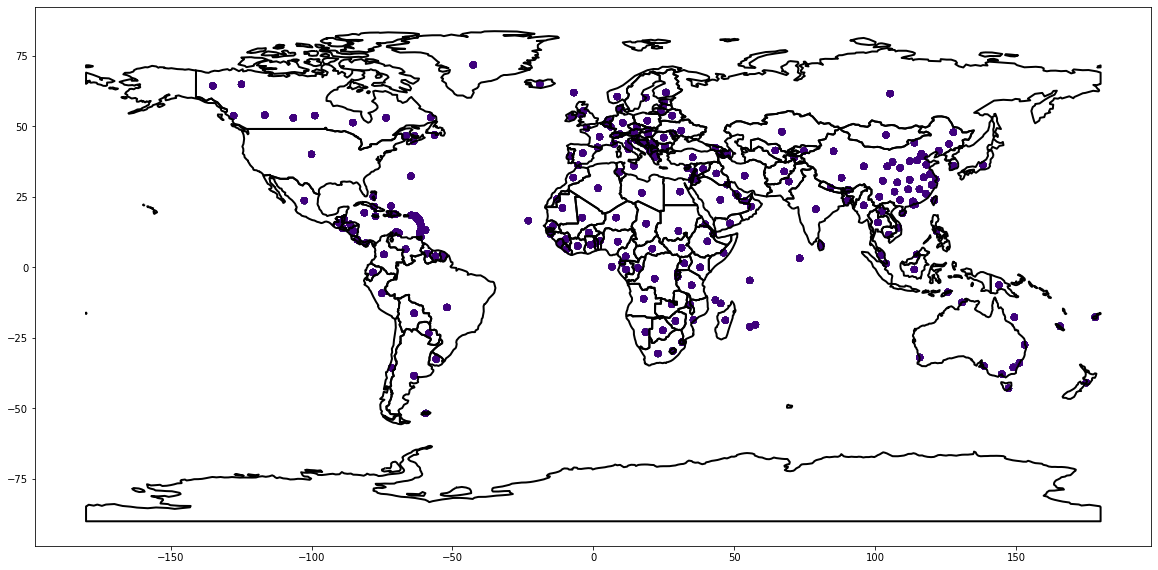

In [72]:
fig,ax = plt.subplots(figsize=(20,10))
gdf_covid.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)